In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df= pd.read_csv("C:/Users/admin/Downloads/Sales_Data.csv")

In [17]:
#Display the first couple of rows of the DataFrame
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [18]:
#Display the last couple of rows of the DataFrame
df.tail()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185945,13617,222905,AAA Batteries (4-pack),1,2.99,07-06-2019 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,01-06-2019 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,22-06-2019 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,26-06-2019 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
185949,13621,222909,AAA Batteries (4-pack),1,2.99,25-06-2019 14:33,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


In [19]:
#total number of unique products sold
df["Product"].nunique()

19

In [21]:
#number of product where Product == 'iPhone'
len(df[df["Product"] == 'iPhone'])

6842

In [30]:
#total sales for each product in descending order
grp=df.groupby('Product')
total_sum=grp['Sales'].sum()
x=total_sum.reset_index()
total_sales=x.sort_values(by='Sales',ascending=False)
total_sales


,Product,Sales
13,Macbook Pro Laptop,8037600.00
18,iPhone,4794300.00
14,ThinkPad Laptop,4129958.70
9,Google Phone,3319200.00
1,27in 4K Gaming Monitor,2435097.56
3,34in Ultrawide Monitor,2355558.01
6,Apple Airpods Headphones,2349150.00
8,Flatscreen TV,1445700.00
7,Bose SoundSport Headphones,1345565.43
2,27in FHD Monitor,1132424.50


In [31]:
#top 10 selling products based on total sales
total_sales.head(10)

,Product,Sales
13,Macbook Pro Laptop,8037600.00
18,iPhone,4794300.00
14,ThinkPad Laptop,4129958.70
9,Google Phone,3319200.00
1,27in 4K Gaming Monitor,2435097.56
3,34in Ultrawide Monitor,2355558.01
6,Apple Airpods Headphones,2349150.00
8,Flatscreen TV,1445700.00
7,Bose SoundSport Headphones,1345565.43
2,27in FHD Monitor,1132424.50


In [107]:
# top 5 customers based on total sales
grp=df.groupby('Purchase Address')
total_sum=grp['Sales'].sum()
x=total_sum.reset_index()
total_sales = x.sort_values(by='Sales', ascending=False).reset_index(drop=True)
total_sales.head(5)


,Purchase Address,Sales
0,"668 Park St, San Francisco, CA 94016",4379.99
1,"795 1st St, Atlanta, GA 30301",4100.00
2,"391 1st St, Seattle, WA 98101",4100.00
3,"10 1st St, San Francisco, CA 94016",4000.00
4,"731 11th St, New York City, NY 10001",3919.88


In [105]:
# top 5 customers based on total sales
grp=df.groupby('City')
total_sum=grp['Sales'].sum()
x=total_sum.reset_index()
total_sales = x.sort_values(by='Sales', ascending=False).reset_index(drop=True)
total_sales.head(5)


,City,Sales
0,San Francisco,8262203.91
1,Los Angeles,5452570.80
2,New York City,4664317.43
3,Boston,3661642.01
4,Atlanta,2795498.58


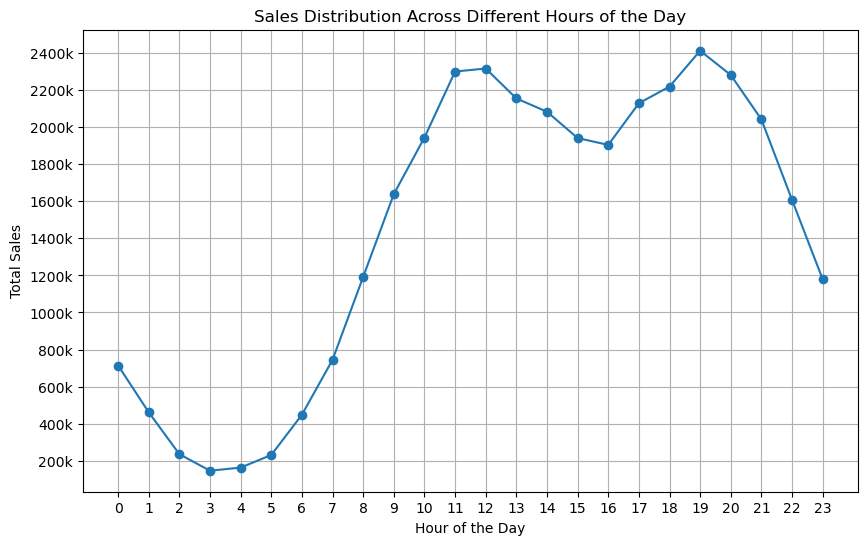

In [91]:
#distribution of sales across different hours of the day
from matplotlib.ticker import FuncFormatter,MultipleLocator
sales_by_hour = df.groupby('Hour')['Sales'].sum()
plt.figure(figsize=(10, 6)) 
plt.plot(sales_by_hour.index, sales_by_hour.values, marker='o')
plt.title('Sales Distribution Across Different Hours of the Day') 
plt.xlabel('Hour of the Day') 
plt.ylabel('Total Sales') 
def thousands(x, pos):
    return f'{int(x / 1000)}k' 
formatter = FuncFormatter(thousands)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_locator(MultipleLocator(200000))
plt.xticks(range(0, 24)) 
plt.grid(True) 
plt.show() 

             City       Sales
0         Atlanta  2795498.58
1          Austin  1819581.75
2          Boston  3661642.01
3          Dallas  2767975.40
4     Los Angeles  5452570.80
5   New York City  4664317.43
6        Portland  2320490.61
7   San Francisco  8262203.91
8         Seattle  2747755.48


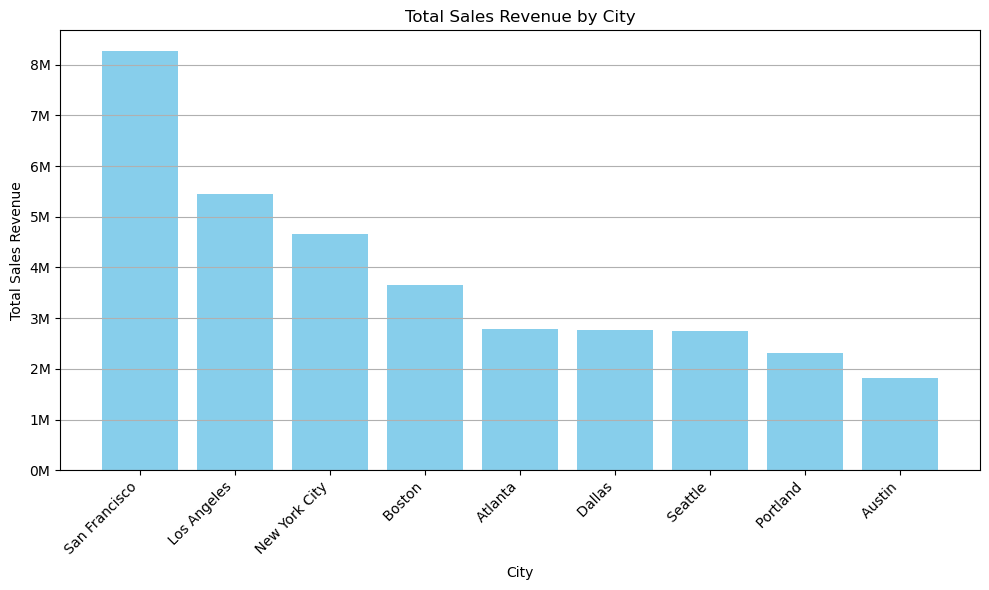

In [103]:
#total sales revenue was generated from each city
sales_by_city = df.groupby('City').agg({'Sales': 'sum'})
sales_by_city = sales_by_city.reset_index()
print(sales_by_city)


sales_by_city = df.groupby('City').agg({'Sales': 'sum'})
sales_by_city = sales_by_city.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(sales_by_city.index, sales_by_city['Sales'], color='skyblue')
plt.title('Total Sales Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Sales Revenue')
def thousands(x, pos):
    return f'{int(x / 1000000)}M' 
formatter = FuncFormatter(thousands)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y')  

# Show the plot
plt.tight_layout()  # Adjust the padding to prevent clipping of tick-labels
plt.show()

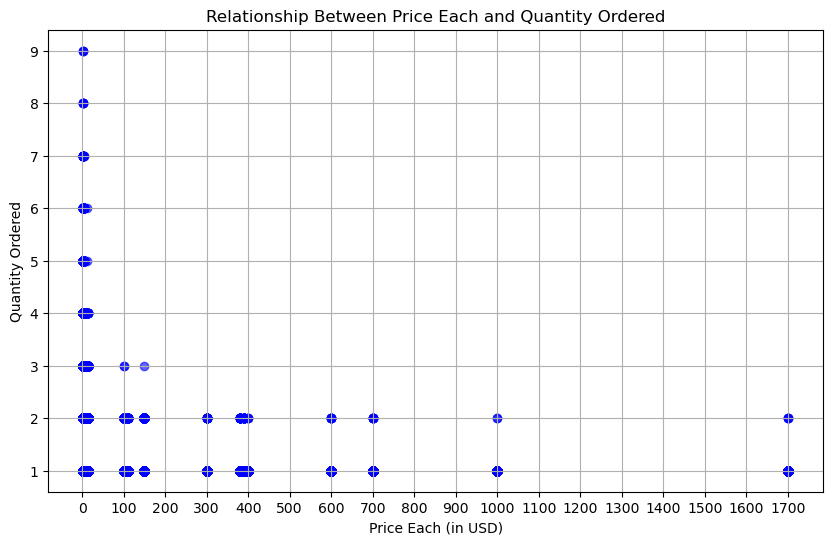

In [121]:
#nalyze the relationship between the price of each product and the quantity ordered

plt.figure(figsize=(10, 6))
plt.scatter(df['Price Each'], df['Quantity Ordered'], alpha=0.6, color='b')
plt.title('Relationship Between Price Each and Quantity Ordered')
plt.xlabel('Price Each (in USD)')
plt.ylabel('Quantity Ordered')
plt.gca().xaxis.set_major_locator(MultipleLocator(100))
plt.grid(True)

plt.show()
